# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaler dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

# pip install wget
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-12 19:59:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.129.112, 142.251.132.240, 142.250.218.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.129.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.3'

pizza_steak.zip.3   100%[===================>] 104.47M  52.1MB/s    in 2.0s    

2022-11-12 19:59:55 (52.1 MB/s) - 'pizza_steak.zip.3' saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

# Walk through pizza_stake directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [6]:
# Another way to find out how many images are in a file
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

# Create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['2885796.jpg']
Image shape: (512, 512, 3)


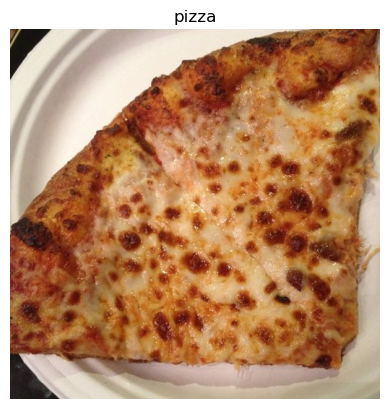

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [12]:
# View image as tensor (in numbers) of Red, Green and Blue color channels
# Actually giant arrays/tensors of different pixel values

import tensorflow as tf
tf.constant(img)

2022-11-12 20:00:24.723189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[109,  72,  28],
        [114,  76,  39],
        [108,  71,  42],
        ...,
        [109,  59,  36],
        [101,  54,  28],
        [112,  65,  37]],

       [[124,  87,  43],
        [117,  79,  42],
        [108,  71,  42],
        ...,
        [110,  62,  39],
        [110,  63,  37],
        [116,  69,  41]],

       [[132,  95,  51],
        [120,  85,  47],
        [115,  78,  49],
        ...,
        [109,  61,  39],
        [119,  73,  47],
        [123,  78,  49]],

       ...,

       [[ 41,  31,  32],
        [ 42,  32,  33],
        [ 43,  33,  34],
        ...,
        [154, 142, 126],
        [153, 141, 125],
        [153, 141, 125]],

       [[ 42,  32,  33],
        [ 42,  32,  33],
        [ 42,  32,  33],
        ...,
        [155, 143, 127],
        [155, 143, 127],
        [154, 142, 126]],

       [[ 42,  32,  33],
        [ 41,  31,  32],
        [ 41,  31,  32],
        ...,
        [155, 143, 12

In [13]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [14]:
# Get all the pixel values between 0 & 1 (for scale - also referred to as normlize)
img/255.0

array([[[0.42745098, 0.28235294, 0.10980392],
        [0.44705882, 0.29803922, 0.15294118],
        [0.42352941, 0.27843137, 0.16470588],
        ...,
        [0.42745098, 0.23137255, 0.14117647],
        [0.39607843, 0.21176471, 0.10980392],
        [0.43921569, 0.25490196, 0.14509804]],

       [[0.48627451, 0.34117647, 0.16862745],
        [0.45882353, 0.30980392, 0.16470588],
        [0.42352941, 0.27843137, 0.16470588],
        ...,
        [0.43137255, 0.24313725, 0.15294118],
        [0.43137255, 0.24705882, 0.14509804],
        [0.45490196, 0.27058824, 0.16078431]],

       [[0.51764706, 0.37254902, 0.2       ],
        [0.47058824, 0.33333333, 0.18431373],
        [0.45098039, 0.30588235, 0.19215686],
        ...,
        [0.42745098, 0.23921569, 0.15294118],
        [0.46666667, 0.28627451, 0.18431373],
        [0.48235294, 0.30588235, 0.19215686]],

       ...,

       [[0.16078431, 0.12156863, 0.1254902 ],
        [0.16470588, 0.1254902 , 0.12941176],
        [0.16862745, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
# Same as the Tiny VGG on the CNN explainer website: https://poloclub.github.io/cnn-explainer/
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model (train_data generated in flow_from_directory function contains X and y for fit)
history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 316ms/step - loss: 0.5832 - accuracy: 0.6793 - val_loss: 0.3892 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 15s 322ms/step - loss: 0.4259 - accuracy: 0.8093 - val_loss: 0.3432 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 15s 323ms/step - loss: 0.3749 - accuracy: 0.8340 - val_loss: 0.3021 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 15s 326ms/step - loss: 0.3547 - accuracy: 0.8527 - val_loss: 0.3366 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 15s 327ms/step - loss: 0.3014 - accuracy: 0.8833 - val_loss: 0.3228 - val_accuracy: 0.8620


In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the mode we've built in a previous section to see if it works with our image data.

The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.41527&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 107ms/step - loss: 0.9743 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


🤔 Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 104ms/step - loss: 5.3024 - accuracy: 0.6020 - val_loss: 2.1519 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 1.2826 - accuracy: 0.6967 - val_loss: 0.5558 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.5536 - accuracy: 0.7607 - val_loss: 0.4717 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.5159 - accuracy: 0.7647 - val_loss: 0.4819 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4958 - accuracy: 0.7673 - val_loss: 0.4318 - val_accuracy: 0.7940


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


😱 My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary Classification: Let's break it down
We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

['2862562.jpg']
Image shape: (384, 512, 3)
['2519291.jpg']
Image shape: (388, 512, 3)


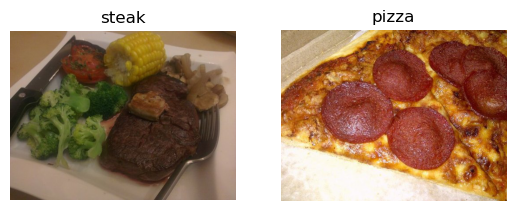

In [26]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [27]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [28]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data (get all of the pixel values between 0 & 1, also 
# called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [29]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [31]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [32]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (https://www.image-net.org - a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (https://poloclub.github.io/cnn-explainer/ - model_1 from above) and build a 3 layer convolutional neural network.

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:

* The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

📖 Resources: For a great demonstration of these in action, be sure to spend some time going through the following:

* https://poloclub.github.io/cnn-explainer/ - a great visual overview of many of the concepts we're replicating here with code.
* https://arxiv.org/pdf/1603.07285.pdf - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
* For a great explanation of padding, see this - https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t/39371113#39371113

Now our model is ready, let's compile it.


In [35]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.